In [188]:

import numpy as np
import pandas as pd
import scipy as sp
import scipy.cluster.hierarchy as hier
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt

%matplotlib inline

ImportError: No module named 'ggplot'

In [47]:
gene = pd.read_excel('gene_expression_table4.xlsx')
#print(gene)
datamatrix=[]
del gene['Unnamed: 9'] # deleted column without any content
#append each column except the first column which is the gene ID
just_expression=gene.iloc[0:373,3:14]
print(just_expression)
just_expression.as_matrix  # transformed dataframe with expression values to array
just_expression.shape
dist_matrix= dist.pdist(just_expression)
dist_square_matrix = dist.squareform(dist_matrix)
#print(dist_square_matrix)

          5       2       6        4        3       1     1.1     5.1     3.1  \
0    3373.5  3757.8  3380.3   4560.2   4682.9  4182.9  5050.6  5820.5  4527.5   
1    1383.0  1501.8  1599.8   1433.7   1359.0  1565.5  1264.8  1285.5  1228.7   
2     864.7  1184.6  1465.4   1387.8   1414.6  1589.6  1847.7  2322.5  2966.6   
3     721.8   940.9   907.6    975.7    865.1   803.3  1417.6   995.4  1650.5   
4     419.0   389.1   390.7    356.1    452.8   400.2   866.8   580.3   637.7   
5     575.4   439.0   496.2    549.3    667.7   588.9   741.2   661.5   821.5   
6      85.9   191.7   113.9     67.4     71.8    89.9   219.8   256.2   267.4   
7     959.6  1083.6  1162.8   1130.0   1088.6  1326.4  1484.5  1677.5  1838.5   
8    1273.6  1216.4  1254.3   1150.1   1242.5  1153.8  1424.4  1736.1  1548.4   
9    4634.5  3749.6  4443.9   3844.0   4063.3  3896.4  3717.0  3725.6  3466.5   
10    327.7   385.4   477.3    259.9    485.8   315.3   608.6   788.1   692.1   
11   4159.3  4099.5  3874.2 

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


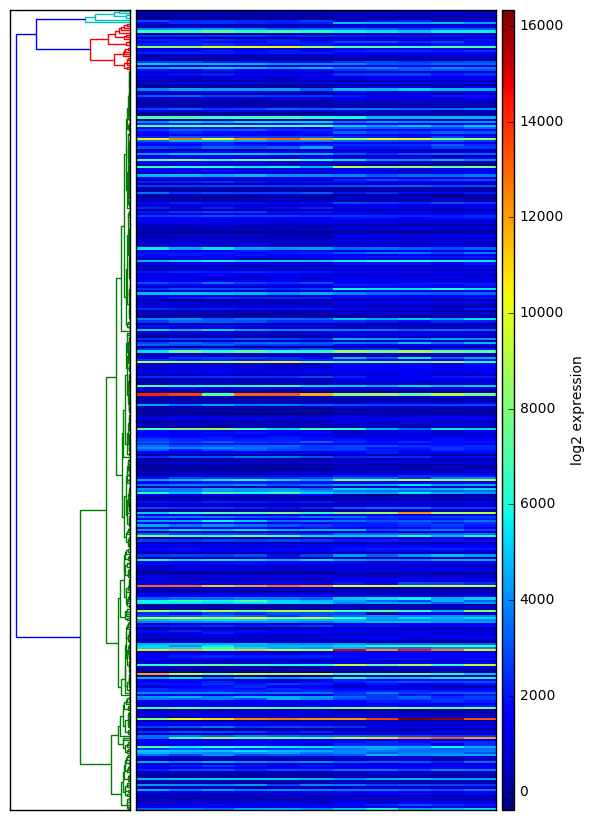

In [14]:
# Compute and plot dendrogram.
fig = pl.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
linkageMatrix = hier.linkage(dist_square_matrix, method='centroid') # created linkage matrix
dendrogram = hier.dendrogram(linkageMatrix, orientation='left') # produced dendrogram of the linkage matrix                             #Y = sch.linkage(D, method='centroid')
#Z = sch.dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = dendrogram['leaves']
im = axmatrix.matshow(just_expression, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pl.colorbar(im, cax=axcolor, label= 'log2 expression')

# Display and save figure.
fig.show()
fig.savefig('dendrogram.png')
fig.set_figheight(10)

In [223]:
#print(just_expression)
BRCA1_plus= just_expression.iloc[:,0:6]
#print(BRCA1_plus.T)
BRCA1_minus= just_expression.iloc[:,7:12]
#print(BRCA1_minus.T)

BRCA1_plus_means=np.mean(BRCA1_plus.T)
#print(BRCA1_plus_means.shape)
BRCA1_minus_means=np.mean(BRCA1_minus.T)
#print(BRCA1_minus_means.shape)

concatenated_means= np.c_[BRCA1_plus_means,BRCA1_minus_means]
#print(concatenated_means)

expression_change_abs= np.abs(np.diff(concatenated_means))
#print(expression_change_abs.shape)

expression_change_raw= np.diff(concatenated_means)
#print(expression_change_raw)

r=np.append(expression_change_abs,expression_change_raw,1)
print(r)

[[ 1173.75        1173.75      ]
 [  256.25        -256.25      ]
 [ 1171.81666667  1171.81666667]
 [  427.83333333   427.83333333]
 [  189.55833333   189.55833333]
 [  183.125        183.125     ]
 [  127.89166667   127.89166667]
 [  483.43333333   483.43333333]
 [  346.75833333   346.75833333]
 [  631.13333333  -631.13333333]
 [  327.91666667   327.91666667]
 [ 1054.33333333 -1054.33333333]
 [  151.49166667   151.49166667]
 [  127.58333333   127.58333333]
 [  458.24166667  -458.24166667]
 [  127.66666667   127.66666667]
 [  256.28333333   256.28333333]
 [  220.54166667   220.54166667]
 [  752.475        752.475     ]
 [  291.76666667   291.76666667]
 [  501.525       -501.525     ]
 [  187.225        187.225     ]
 [ 1000.30833333 -1000.30833333]
 [  273.24166667   273.24166667]
 [  169.10833333   169.10833333]
 [ 1324.09166667  1324.09166667]
 [  795.39166667  -795.39166667]
 [ 1383.75833333 -1383.75833333]
 [ 1061.86666667  1061.86666667]
 [ 1137.08333333 -1137.08333333]
 [  771.17

In [227]:
a=gene.iloc[0:373,0:3]
print(a.shape)
names=['mean','raw mean']
mean_pandas_abs= pd.DataFrame(r,columns=names)
print(mean_pandas.shape)

mean_append= np.append(a,mean_pandas,1)

names2= ['gene name', 'symbol','function','abs value mean difference','raw mean difference']
h=pd.DataFrame(means2_append,columns=names2)

sorted_means=h.sort(['abs value mean difference'],ascending=False)
print(sorted_means)




(373, 3)
(373, 1)
    gene name     symbol                 function abs value mean difference  \
33     J00105        B2M                      MHC                   5113.19   
89     U78525     EIF3S9              translation                   4419.59   
193    U71088     MAP2K5      signal transduction                   3964.28   
42     M19311      CALM1               cell cycle                    3690.3   
153    M97796       ID2             transcription                   3498.07   
63     M20471       CLTA                structure                   3286.91   
302    U53347     SLC1A5                transport                   3277.22   
318    M34338        SRM                 synthase                   2935.18   
138    D49824  HLAB-null                 receptor                   2921.48   
242    Y12711        PBP                 receptor                   2904.28   
104    M88279      FKBP4      signal transduction                    2659.8   
312    X04654     SNRP70          

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


['DNA repair' 'DNA replication' 'MHC' 'RNA processing' 'adhesion'
 'amino acid metabolism' 'antigen' 'apoptosis' 'carbohydrate metabolism'
 'catalase' 'cell cycle' 'channels and pores' 'chromatin structure'
 'chromosome inactivation' 'coagulation' 'communication' 'dehydrogenase'
 'differentiation' 'extracellular oxidant' 'growth factor' 'helicase'
 'hematopoiesis' 'hormone' 'immune response' 'lipid metabolism'
 'lysosomal protein' 'motility' 'neuro peptide' 'nucleologenesis'
 'nucleotide synthesis' 'nucloetide synthesis' 'oxidase' 'phosphatase '
 'proliferation' 'protein folding' 'protein metabolism'
 'protein processing' 'proteolysis' 'receptor' 'respiration'
 'ribosome biogenesis' 'signal transduction' 'structure' 'surface protein'
 'synthase' 'tautomerase' 'transcription' 'transferase' 'translation'
 'transport' 'tumor suppressor' 'ubiquitination' 'unknown']


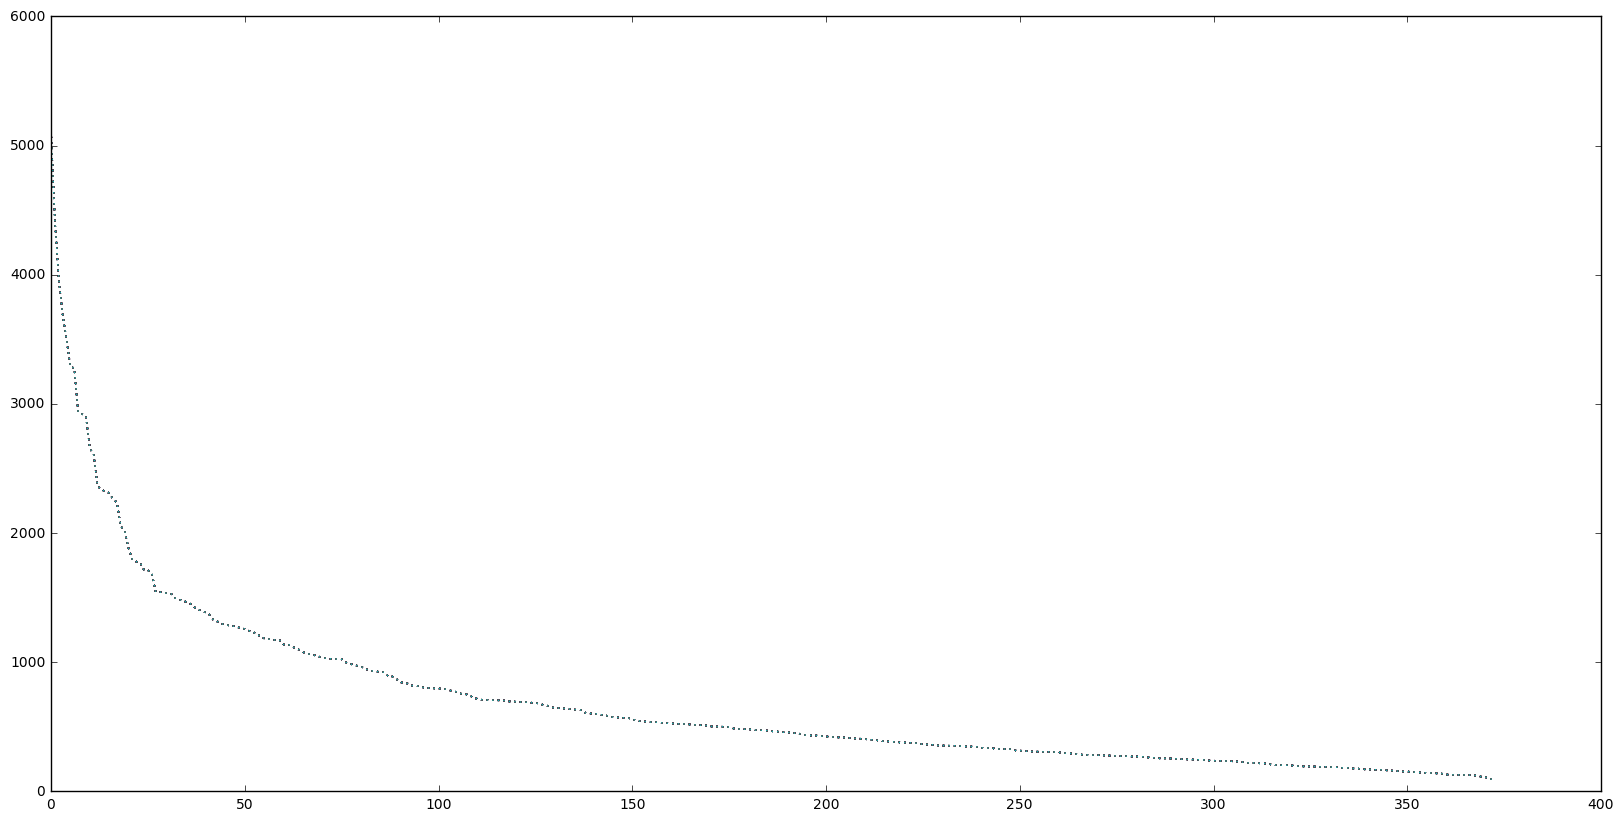

In [226]:
 
fig= plt.figure()

#plt.subplot(211)
#plt.plot(np.arange(373),sorted_means.iloc[:,3],':')
fig.set_figheight(10)
fig.set_figwidth(20)
#plt.subplot(212)
#plt.plot(np.arange(373),sorted_means.iloc[:,4],'.')


f=np.unique(sorted_means.iloc[:,2])
print(f)

for i in np.unique(sorted_means.iloc[:,2]):
    plt.plot(np.arange(373),sorted_means.iloc[:,3],':' )






In [206]:
u=sorted_means.groupby(['function'])
u.describe


<function pandas.core.groupby._GroupBy._make_wrapper.<locals>.wrapper>

In [216]:
from ggplot import *

plt.ggplot(aes(y = 'raw mean difference', color = 'function'))

ImportError: No module named 'ggplot'